
## Cancelamento de ruído utilizando LMS  

Considere que o sinal de voz $x(n)$ deve ser transmitido por uma canal de comunicação que possuí a seguinte função de transferência  $H(z)$ :
$$H(z)  =  1  + 0.5z^{-1} + 2z^{-2}- 0.1z^{-3}  $$ </br>

Além disso, o sinal também é contaminado por um ruído AWNG, de modo que o sinal resultante $s(n)$ será:
$$ s(n) = x(n)*h(n)+ w(n) $$ </br>

Utilize algum algoritmo de filtragem adaptativa (LMS ou LMS normalizado) para desfazer as distorções no sinal original. 

In [ ]:
#importação das bibliotecas
from scipy.io import wavfile
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from playsound import playsound
import simpleaudio as sa 

In [ ]:
#importação do arquivo .wav de áudio
freamostragem, sinal = wavfile.read('output.wav')

Text(0, 0.5, 'Amplitude')

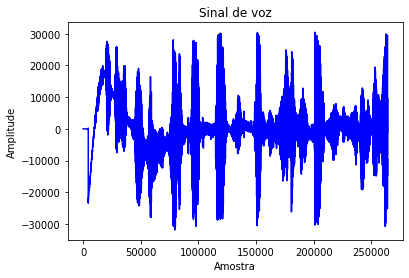

In [ ]:
#plot da evolução temporal da voz
snormal= sinal 
plot.title('Sinal de voz')
plot.plot(snormal,color='b')
plot.xlabel('Amostra')
plot.ylabel('Amplitude')


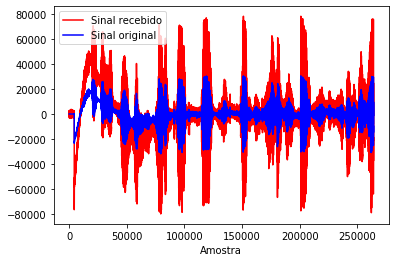

In [ ]:
h = [1, 0.5, 2, -1] # filtro FIR 
s = signal.convolve(snormal, [1, 0.5, 2, -1])  # resposta ao canal
s = s+1000*np.random.normal(0, 1, len(s))
plt.plot(s,color='r',label='Sinal recebido')
plt.plot(snormal,color='b',label='Sinal original')
plot.xlabel('Amostra')
plt.legend(loc='upper left')

 

Text(0, 0.5, '$e^2$')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


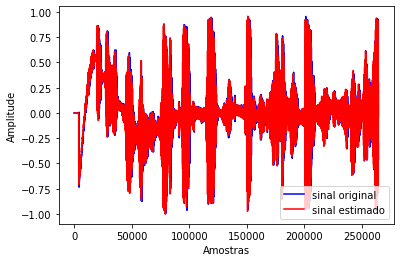

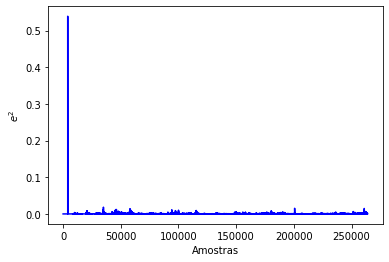

In [ ]:
X  = np.array(s[0:len(snormal)])/ np.abs(s[0:len(snormal)]).max() #sinal de entrada normalizado
D =np.array(sinal)/ np.abs(sinal).max() #sinal desejado normalizado
N = len(X) 
K = 400 # ordem do filtro
x = np.random.randn(N)  
x = x/x*X
h = signal.firwin(K, 0.5)  
t = signal.convolve(x, h) 
t =  x/x*D
mu = 0.01 #passo LMS 
fig = plt.figure() 
w = np.zeros(K) # condições iniciais
e = np.zeros(N-K) #erro
y = [] #sinal estimado
for n in range(0, N-K):
    xn = x[n+K:n:-1]
    en = t[n+K] - np.dot(xn , w) #  
    w = w + mu * en * xn # atualização (LMS)
    e[n] = en 
    y.append(np.dot(xn , w))


plt.plot(t,label='sinal original',color='b')
plt.plot(y,label='sinal estimado',color='r')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend() 
plt.figure()
plt.plot(e**2,color='b')
plt.xlabel('Amostras')
plt.ylabel('$e^2$')

- Voz original


In [ ]:
audio =sinal.astype(np.int16)
play_obj = sa.play_buffer(audio, 1, 2, 44100  ) 
play_obj.wait_done()

- voz transmitida (sinal recebido)

In [ ]:
 
audio =.astype(np.int16)
play_obj = sa.play_buffer(audio, 1, 2, 44100  ) 
play_obj.wait_done() 

-voz  após a filtragem (sinal estimado)

In [ ]:
D np.array(y)*max(sinal)
audio =s.astype(np.int16)
play_obj = sa.play_buffer(audio, 1, 2, 44100  ) 
play_obj.wait_done() 